In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/content/drive/My Drive/Utilization.csv'
data = pd.read_csv(data_path)

print(data.head())

print(data.info())


          NPI  Ind_PAC_ID Provider Last Name Provider First Name  \
0  1003000480   446348254          ROTHCHILD               KEVIN   
1  1003000480   446348254          ROTHCHILD               KEVIN   
2  1003000597  4082848189                KIM                 DAE   
3  1003000639  8527252766          BENHARASH              PEYMAN   
4  1003000936  9739278128      STELLINGWORTH                MARK   

  Provider Middle Name suff                   Procedure_Category Count  \
0                    B  NaN         Hernia repair – groin (open)  1-10   
1                    B  NaN   Hernia repair (minimally invasive)  1-10   
2                  NaN  NaN                   Prostate resection    40   
3                  NaN  NaN  Coronary artery bypass graft (CABG)    15   
4                  NaN  NaN        Pacemaker insertion or repair    15   

   Percentile Profile_Display_Indicator  
0         NaN                         Y  
1         NaN                         Y  
2        85.0       

In [17]:
print(data.isnull().sum())

data.dropna(inplace=True)

categorical_columns = ['Provider Last Name', 'Provider First Name', 'Provider Middle Name', 'suff', 'Procedure_Category', 'Profile_Display_Indicator']
for column in categorical_columns:
    data[column] = data[column].astype(str)

cleaned_data_path = '/content/drive/My Drive/cleaned_utilization.csv'
data.to_csv(cleaned_data_path, index=False)

NPI                               0
Ind_PAC_ID                        0
Provider Last Name                5
Provider First Name               1
Provider Middle Name          41282
suff                         142473
Procedure_Category                0
Count                             0
Percentile                    62359
Profile_Display_Indicator         0
dtype: int64


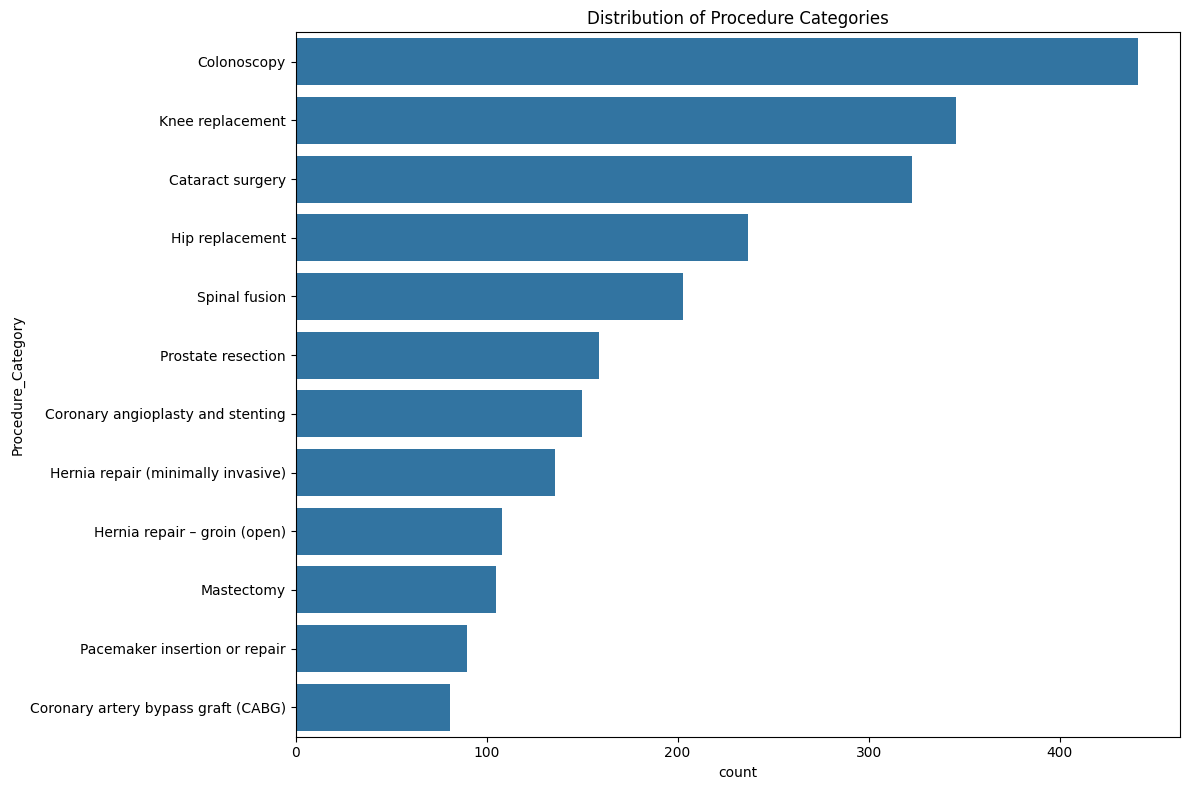

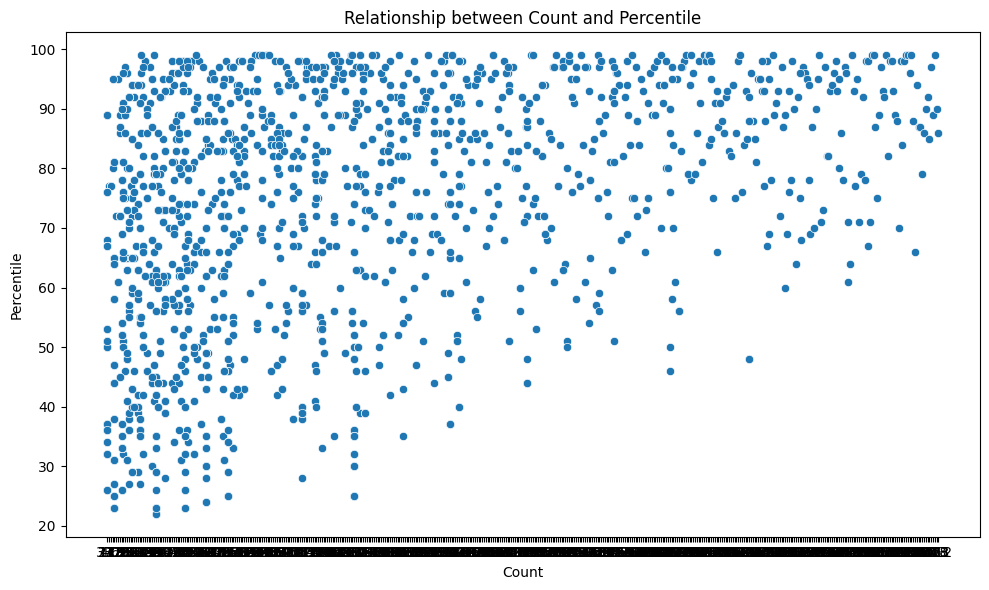

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Procedure_Category', data=data, order=data['Procedure_Category'].value_counts().index)
plt.title('Distribution of Procedure Categories')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/procedure_category_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Count', y='Percentile', data=data)
plt.title('Relationship between Count and Percentile')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/count_vs_percentile.png')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['Count']]
y = data['Percentile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 359.35939363976917
R^2 Score: 0.13231886476008425
